<a href="https://colab.research.google.com/github/chongzicbo/Dive-into-Deep-Learning-tf.keras/blob/master/3.8.%20%E5%A4%9A%E5%B1%82%E6%84%9F%E7%9F%A5%E6%9C%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###3.8. 多层感知机
我们已经介绍了包括线性回归和softmax回归在内的单层神经网络。然而深度学习主要关注多层模型。在本节中，我们将以多层感知机（multilayer perceptron，MLP）为例，介绍多层神经网络的概念。

###3.8.1. 隐藏层
多层感知机在单层神经网络的基础上引入了一到多个隐藏层（hidden layer）。隐藏层位于输入层和输出层之间。图3.3展示了一个多层感知机的神经网络图。
<div align=center><img src="https://zh.gluon.ai/_images/mlp.svg" width="300"/></div>
<center>图 3.3 带有隐藏层的多层感知机。它含有一个隐藏层，该层中有5个隐藏单元</center>

\


在图3.3所示的多层感知机中，输入和输出个数分别为4和3，中间的隐藏层中包含了5个隐藏单元（hidden unit）。由于输入层不涉及计算，图3.3中的多层感知机的层数为2。由图3.3可见，隐藏层中的神经元和输入层中各个输入完全连接，输出层中的神经元和隐藏层中的各个神经元也完全连接。因此，多层感知机中的隐藏层和输出层都是全连接层。\
\
具体来说，给定一个小批量样本$X \in R^{n \times d}$,其批量大小为$n$,输入个数为d。假设多层感知机只有一个隐藏层，其中隐藏单元个数为$h$.记隐藏层的输出(也称为隐藏层变量或者隐藏变量)为$H$,有$H \in R^{n \times h}$。因为隐藏层和输出层均是全连接层，可以设隐藏层的权重参数和偏差参数分别为$W_h \in R^{d \times h}$和$b_h \in R^{1 \times h}$。输出层的权重和偏差参数分别为$W_o \in R^{h \times q}$和$b_o \in R^{1 \times q}$。\
我们先来看一种含单隐藏层的多层感知机的设计。其输出 $O \in R^{n \times q}$的计算为：
$$
\begin{split}\begin{aligned}
\boldsymbol{H} &= \boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h,\\
\boldsymbol{O} &= \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o,
\end{aligned}\end{split}
$$
也就是将隐藏层的输出直接作为输出层的输入。如果将以上两个式子联立起来，可以得到
$$
\boldsymbol{O} = (\boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h)\boldsymbol{W}_o + \boldsymbol{b}_o = \boldsymbol{X} \boldsymbol{W}_h\boldsymbol{W}_o + \boldsymbol{b}_h \boldsymbol{W}_o + \boldsymbol{b}_o.
$$
从联立后的式子可以看出，虽然神经网络引入了隐藏层，却依然等价于一个单层神经网络：其中输出层权重参数为
$\boldsymbol{W}_h\boldsymbol{W}_o$,偏差参数为$\boldsymbol{b}_h \boldsymbol{W}_o + \boldsymbol{b}_o$。不难发现，即便再添加更多的隐藏层，以上设计依然只能与仅含输出层的单层神经网络等价。
\
###3.8.2. 激活函数
上述问题的根源在于全连接层只是对数据做仿射变换（affine transformation），而多个仿射变换的叠加仍然是一个仿射变换。解决问题的一个方法是引入非线性变换，例如对隐藏变量使用按元素运算的非线性函数进行变换，然后再作为下一个全连接层的输入。这个非线性函数被称为激活函数（activation function）。下面我们介绍几个常用的激活函数。

####3.8.2.1. ReLU函数
ReLU（rectified linear unit）函数提供了一个很简单的非线性变换。给定元素 x ，该函数定义为
$$
\text{ReLU}(x) = \max(x, 0).
$$
可以看出，ReLU函数只保留正数元素，并将负数元素清零。为了直观地观察这一非线性变换，我们先定义一个绘图函数xyplot。

In [1]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import tensorflow as tf

In [0]:
tf.enable_eager_execution()

In [0]:
def use_svg_display():
  #用矢量图显示
  display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
  use_svg_display()
  #设置图的尺寸
  plt.rcParams['figure.figsize']=figsize

In [0]:
def xyplot(x_vals,y_vals,name):
  set_figsize(figsize=(5,2.5))
  plt.plot(x_vals.numpy(),y_vals.numpy())
  plt.xlabel('x')
  plt.ylabel(name+'(x)')
  

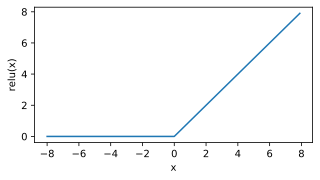

In [5]:
x=tf.range(-8.0,8.0,0.1)
with tf.GradientTape() as t:
  t.watch(x)
  y=tf.nn.relu(x)
xyplot(x,y,'relu')

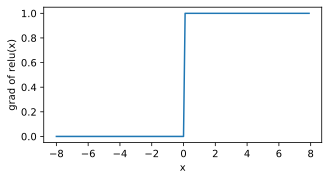

In [6]:
x_grad=t.gradient(y,x) #求导
xyplot(x,x_grad,'grad of relu')

####3.8.2.2. sigmoid函数
sigmoid函数可以将元素的值变换到0和1之间：
$$
\text{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.
$$
sigmoid函数在早期的神经网络中较为普遍，但它目前逐渐被更简单的ReLU函数取代。在后面“循环神经网络”一章中我们会介绍如何利用它值域在0到1之间这一特性来控制信息在神经网络中的流动。下面绘制了sigmoid函数。当输入接近0时，sigmoid函数接近线性变换。


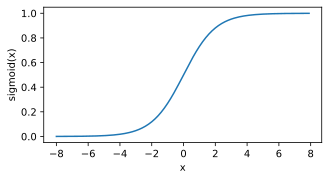

In [7]:
with tf.GradientTape()as t:
  t.watch(x)
  y=tf.sigmoid(x)
xyplot(x,y,'sigmoid')

依据链式法则，sigmoid函数的导数
$$
\text{sigmoid}'(x) = \text{sigmoid}(x)\left(1-\text{sigmoid}(x)\right).
$$
下面绘制了sigmoid函数的导数。当输入为0时，sigmoid函数的导数达到最大值0.25；当输入越偏离0时，sigmoid函数的导数越接近0。

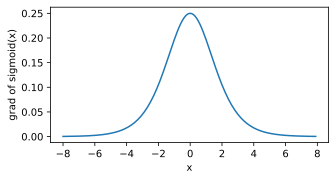

In [8]:
x_grad=t.gradient(y,x)
xyplot(x,x_grad,'grad of sigmoid')

####3.8.2.3. tanh函数
tanh（双曲正切）函数可以将元素的值变换到-1和1之间：
$$
\text{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.
$$
我们接着绘制tanh函数。当输入接近0时，tanh函数接近线性变换。虽然该函数的形状和sigmoid函数的形状很像，但tanh函数在坐标系的原点上对称。

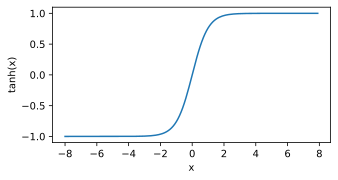

In [9]:
with tf.GradientTape() as t:
  t.watch(x)
  y=tf.tanh(x)

xyplot(x,y,'tanh')

依据链式法则，tanh函数的导数
$$
\text{tanh}'(x) = 1 - \text{tanh}^2(x).
$$
下面绘制了tanh函数的导数。当输入为0时，tanh函数的导数达到最大值1；当输入越偏离0时，tanh函数的导数越接近0。

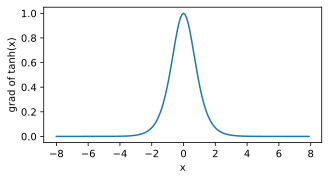

In [10]:
x_grad=t.gradient(y,x)
xyplot(x,x_grad,'grad of tanh')

###3.8.3. 多层感知机
多层感知机就是含有至少一个隐藏层的由全连接层组成的神经网络，且每个隐藏层的输出通过激活函数进行变换。多层感知机的层数和各隐藏层中隐藏单元个数都是超参数。以单隐藏层为例并沿用本节之前定义的符号，多层感知机按以下方式计算输出：
$$
\begin{split}\begin{aligned}
\boldsymbol{H} &= \phi(\boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h),\\
\boldsymbol{O} &= \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o,
\end{aligned}\end{split}
$$
其中$\phi$表示激活函数。在分类问题中，我们可以对输出 $O$ 做softmax运算，并使用softmax回归中的交叉熵损失函数。 在回归问题中，我们将输出层的输出个数设为1，并将输出 $O$ 直接提供给线性回归中使用的平方损失函数。

###3.8.4. 小结
多层感知机在输出层与输入层之间加入了一个或多个全连接隐藏层，并通过激活函数对隐藏层输出进行变换。
常用的激活函数包括ReLU函数、sigmoid函数和tanh函数。